REFERENCE
- Textbook: “Numerical Methods for Engineers, 8th edition” Steven C. Chapra and Raymond P. Canale, ISBN:1260232077, Copyright year:2021, McGraw-Hill.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

### Problem 21.4

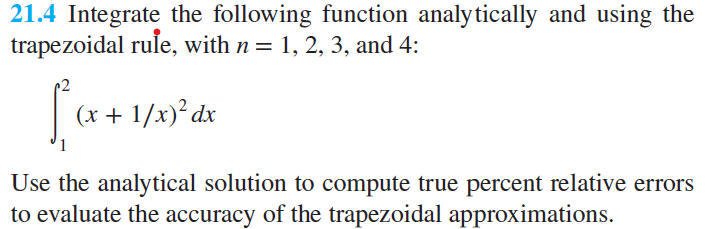

### Answer

1. Define Functions

In [2]:
# reference: this function is from my submitted assignment of last semester
def true_percent_relative_error(true, approx):
    """
    Calculates the true percent relative error.
    
    true: true value
    approx: approximation
    
    Returns: true percent relative error (in percent)
    """
    if true == 0:
        return None
    epsilon_t = (true - approx) / true * 100 
    return epsilon_t

In [3]:
def trap(h, f0, f1):
    """
    Reference: this function implements the pseudocode of figure 21.9 of the textbook,
    single-segment trapezoidal rule
    (take integral under trapezoidal for each segment)
    """
    
    trap = h * (f0 + f1) / 2
    
    return trap

def trapm(f, a, b, n):
    """
    Reference: this function implements the pseudocode of figure 21.9 of the textbook,
    multiple-segment trapezoidal rule
    (take integral under trapezoidal for each segment)
    
    f: the function to be integrated
    a: initial point of the integral
    b: end point of the integral
    n: number of segments
    """
    
    h = (b - a) / n # width of the segment
    
    _sum = f(a)
    for i in range(1, n):
        _sum += 2 * f(a + i * h)
    
    _sum += f(b)
    
    trapm = h * _sum / 2
    
    return trapm

2. Problem Solving

2.1. analytically

$$
\int_{1}^{2} (x + 1/x)^{2} \,dx
= \int_{1}^{2} (x^{2} + 2 + 1/x^{2}) \,dx
= (x^{3}/3 + 2x - 1/x) \Big|_{1}^{2}
= \frac{37}{6} - \frac{4}{3}
= \frac{29}{6}
= 4.8333333...
$$

2.2. trapezoidal rule

In [4]:
# function in this problem
def f1(x):
    result = (x + (1 / x)) ** 2
    return result

# calculate the integral
for n in (1, 2, 3, 4):
    approx = trapm(f1, 1, 2, n)
    error = true_percent_relative_error(29/6, approx)
    print('\nThe number of segments: {}'.format(n))
    print('The trapezoidal result is: {:.4f}'.format(approx))
    print('The true percent relative error is : {:.2f}%'.format(error))


The number of segments: 1
The trapezoidal result is: 5.1250
The true percent relative error is : -6.03%

The number of segments: 2
The trapezoidal result is: 4.9097
The true percent relative error is : -1.58%

The number of segments: 3
The trapezoidal result is: 4.8677
The true percent relative error is : -0.71%

The number of segments: 4
The trapezoidal result is: 4.8527
The true percent relative error is : -0.40%


2.3. evaluate the accuracy 

As we could see from the above results, as the number of segments (n) increases, the true percent relative error decreases, and the accuracy of the trapezoidal approximation increases

3. Testing

In [5]:
import scipy.integrate as integrate
result = integrate.quad(lambda x: f1(x), 1, 2)
result

(4.833333333333333, 5.366077952354923e-14)

### Problem 21.5

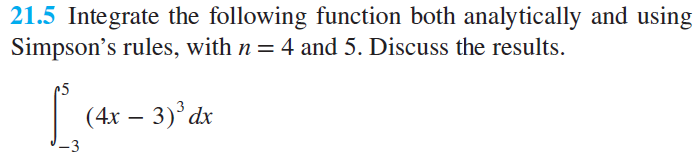

### Answer

1. Define Functions

In [6]:
def simp13(h, f0, f1, f2):
    """
    Reference: this function implements the pseudocode of figure 21.13 of the textbook,
    single-application for Simpson's 1/3 rule
    (take integral under polynomial for each segment)
    """
    
    simp13 = 2 * h * (f0 + 4 * f1 + f2) / 6
    return simp13


def simp38(h, f0, f1, f2, f3):
    """
    Reference: this function implements the pseudocode of figure 21.13 of the textbook,
    single-application for Simpson's 3/8 rule
    (take integral under polynomial for each segment)
    """
    
    simp38 = 3 * h * (f0 + 3 * f1 + 3 * f2 + f3) / 8
    return simp38
  

def simp13m(f, a, b, n):
    """
    Reference: this function implements the pseudocode of figure 21.13 of the textbook,
    multiple-application for Simpson's 1/3 rule, even number of segments
    (take integral under polynomial for each segment)
    """
    
    h = (b - a) / n # width of the segment
    
    _sum = f(a)
    for i in range(1, n - 1, 2):
        _sum += 4 * f(a + i * h) + 2 * f(a + (i + 1) * h)
    
    _sum += 4 * f(a + (n - 1) * h) + f(a + n * h)
    
    simp13m = h * _sum / 3
    return simp13m

    
def sim_int(f, a, b, n):
    """
    Reference: this function implements the pseudocode of figure 21.13 of the textbook,
    multiple-application for Simpson's rule, both odd and even number of segments
    (take integral under polynomial for each segment)
    """
    
    h = (b - a) / n # width of the segment
    
    _sum = 0
    if n == 1:
        _sum = trap(h, f(a), f(b))
    else:
        m = n
        odd = n / 2 - int(n / 2)
        
        if odd > 0 and n > 1:
            _sum += simp38(h, f(b - 3 * h), f(b - 2 * h), f(b - h), f(b))
            m = n - 3
        
        if m > 1:
            _sum += simp13m(f, a, a + m * h, m)
    
    return _sum

2. Problem Solving

2.1. analytically
$$
\int_{-3}^{5} (4x - 3)^{3} \,dx
= \int_{-3}^{5} (64x^{3} - 144x^{2} + 108x - 27) \,dx
= (16x^{4} - 48x^{3} + 54x^{2} - 27x) \Big|_{-3}^{5}
= 5215 - 3159
= 2056
$$

2.2. Simpson's rule

In [7]:
# function in this problem
def f2(x): 
    result = (4 * x - 3) ** 3
    return result

# calculate the integral
for n in (4, 5):
    approx = sim_int(f2, -3, 5, n)
    error = true_percent_relative_error(2056, approx)
    print('\nThe number of segments: {}'.format(n))
    print('The simpson result is: {:.14f}'.format(approx))
    print('The true percent relative error is : {:.2f}%'.format(error))


The number of segments: 4
The simpson result is: 2056.00000000000000
The true percent relative error is : 0.00%

The number of segments: 5
The simpson result is: 2056.00000000000136
The true percent relative error is : -0.00%


2.3. evaluate the accuracy 

As we could see from the above results, for n = 4, the result is exactly correct, and for n = 5, it is just slightly higher, almost the same.  Both results have very high accuracy.

3. Testing

In [8]:
import scipy.integrate as integrate
result = integrate.quad(lambda x: f2(x), -3, 5)
result

(2056.0, 9.308131734564044e-11)